# 03. 2-dimensional data

### Indicators that describe the relationship between two datasets
- Studnet who has high math score, has high english score?

In [2]:
import numpy as np
import pandas as pd

# %precision 3
# pd.set_option('precision', 3)

In [4]:
df = pd.read_csv('../data/ch2_scores_em.csv',
                 index_col='student number')

In [5]:
en_scores = np.array(df['english'])[:10]
ma_scores = np.array(df['mathematics'])[:10]

scores_df = pd.DataFrame({'english':en_scores,
                          'mathematics':ma_scores},
                         index=pd.Index(['A', 'B', 'C', 'D', 'E',
                                         'F', 'G', 'H', 'I', 'J'],
                                        name='student'))
scores_df

,english,mathematics
student,,
A,42,65
B,69,80
C,56,63
D,41,63
E,57,76
F,48,60
G,65,81
H,49,66
I,65,78


### 3. 1. 2. Covariance
- 부호를 붙인 면적

In [7]:
summary_df = scores_df.copy()
summary_df['english_deviation'] =\
    summary_df['english'] - summary_df['english'].mean()
summary_df['mathematics_deviation'] =\
    summary_df['mathematics'] - summary_df['mathematics'].mean()
summary_df['product of deviations'] =\
    summary_df['english_deviation'] * summary_df['mathematics_deviation']
summary_df

,english,mathematics,english_deviation,mathematics_deviation,product of deviations
student,,,,,
A,42,65,-13.0,-6.4,83.2
B,69,80,14.0,8.6,120.4
C,56,63,1.0,-8.4,-8.4
D,41,63,-14.0,-8.4,117.6
E,57,76,2.0,4.6,9.2
F,48,60,-7.0,-11.4,79.8
G,65,81,10.0,9.6,96.0
H,49,66,-6.0,-5.4,32.4
I,65,78,10.0,6.6,66.0


In [8]:
summary_df['product of deviations'].mean()

62.800

In [10]:
en_scores, ma_scores

(array([42, 69, 56, 41, 57, 48, 65, 49, 65, 58]),
 array([65, 80, 63, 63, 76, 60, 81, 66, 78, 82]))

In [13]:
# covariance matrix or variance-covariance matrix
cov_mat = np.cov(en_scores, ma_scores, ddof = 0)
cov_mat

# Diagonal elements: variances of each variable
# cov_matrix[0,0] = 86.0 → Var(X) = 86
# cov_matrix[1,1] = 68.44 → Var(Y) = 68.44

# Off-diagonal elements: covariance between the two variables
# cov_matrix[0,1] = 62.8 → Cov(X,Y) = 62.8
# cov_matrix[1,0] = 62.8 → Cov(Y,X) = 62.8 (Covariance matrix is symmetric)

array([[86.  , 62.8 ],
       [62.8 , 68.44]])

In [15]:
cov_mat[0, 0], cov_mat[1, 1]

(86.000, 68.440)

In [16]:
np.var(en_scores, ddof = 0), np.var(ma_scores, ddof = 0)

(86.000, 68.440)

### 3. 1. 2 Correlation coefficient
- 단위에 의존하지 않는 상관을 나타내는 지표가 필요함 
- 공분산은 각 데이터의 단위를 곱한 것이므로, 공분산을 각 데이터의 표준편차로 나누어 단위에 의존하지 않는 지표를 정의한다

In [17]:
np.cov(en_scores, ma_scores, ddof = 0)[0, 1] /\
    (np.std(en_scores) * np.std(ma_scores))

0.819

In [20]:
# correlation matrix
np.corrcoef(en_scores, ma_scores)

array([[1.   , 0.819],
       [0.819, 1.   ]])

In [19]:
scores_df.corr()

,english,mathematics
english,1.000000,0.818569
mathematics,0.818569,1.000000


## Visualisation of 2-dimentional data

### 3.2.1 Scatter plot

In [7]:
import matplotlib.pyplot as plt

%matplotlib inline

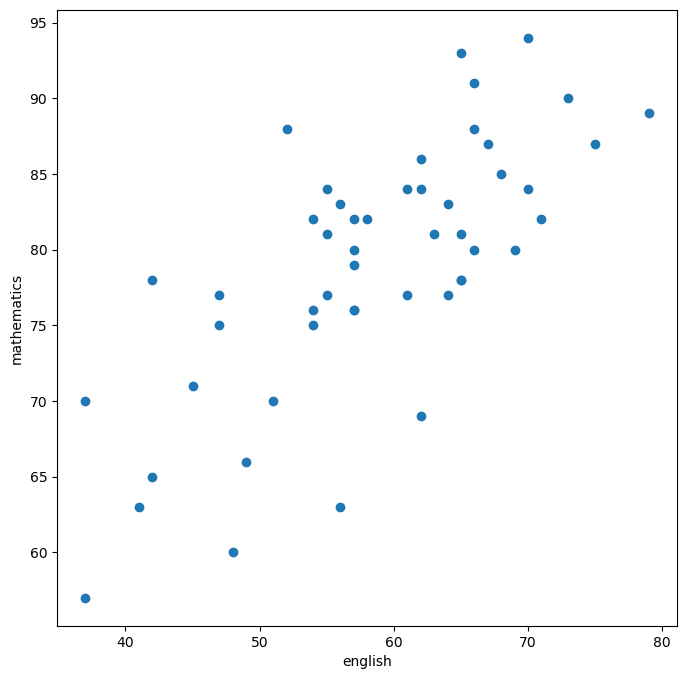

In [26]:
english_scores = np.array(df['english'])
math_scores = np.array(df['mathematics'])

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)

# Scatter plot
ax.scatter(english_scores, math_scores)
ax.set_xlabel('english')
ax.set_ylabel('mathematics')

plt.show()

### 3.2.2 regression line

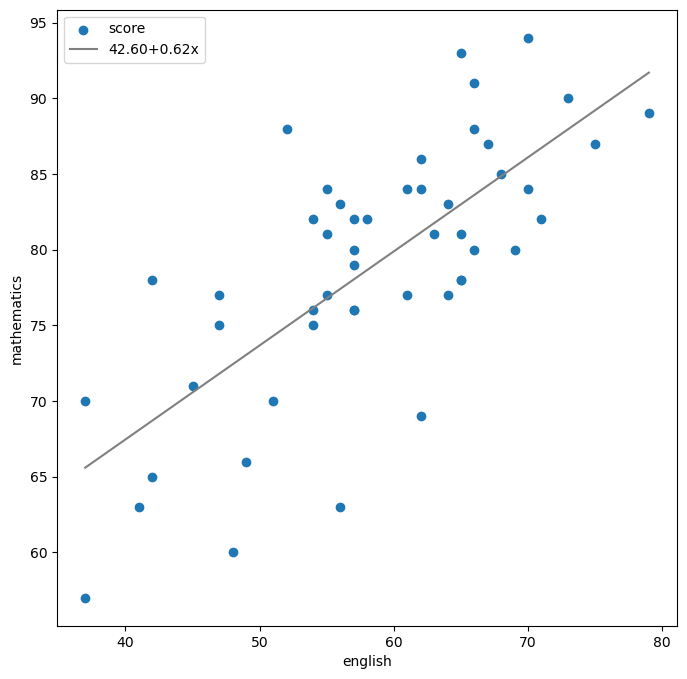

In [ ]:
poly_fit = np.polyfit(english_scores, math_scores, 1)
ploy_1d = np.poly1d(poly_fit)

xs = np.linspace(english_scores.min(), english_scores.max())
ys = ploy_1d(xs) 

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)
ax.set_xlabel('english')
ax.set_ylabel('mathematics')

#scatter plot
ax.scatter(english_scores, math_scores, label='score')

# regression line
ax.plot(xs, ys, color='gray',
        label=f'{poly_fit[1]:.2f}+{poly_fit[0]:.2f}x')

ax.legend(loc='upper left')
plt.show()

### 3.2.3 Heatmap

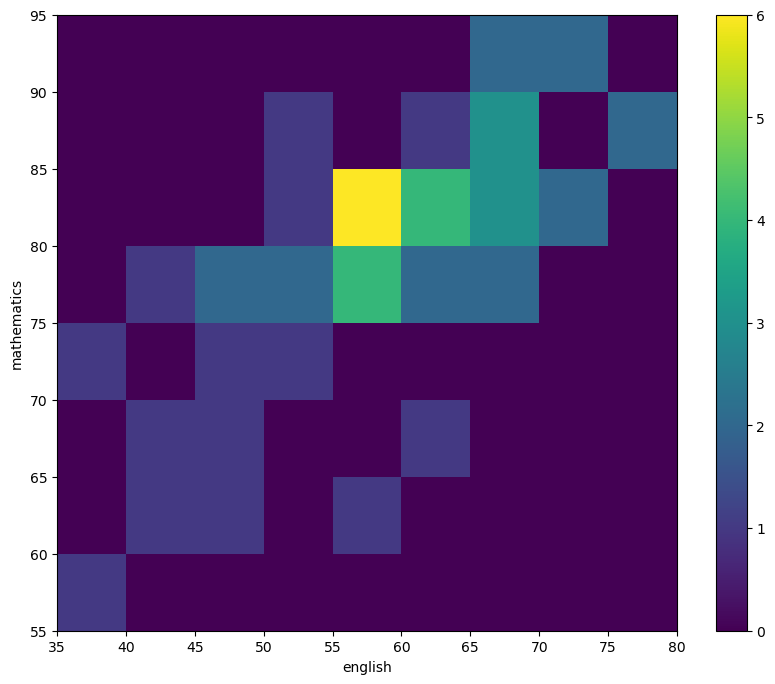

In [ ]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)

c = ax.hist2d(english_scores, math_scores,
              bins=[9, 8], range=[(35, 80), (55, 95)])
ax.set_xlabel('english')
ax.set_ylabel('mathematics')
ax.set_xticks(c[1])
ax.set_yticks(c[2])

fig.colorbar(c[3], ax=ax)
plt.show()

## 3.3 Anscombe’s quartet
- 동일한 지표를 가지고 있지만, 전혀 다른 데이터가 되는 예

In [4]:
anscombe_data = np.load('../data/ch3_anscombe.npy')
print(anscombe_data.shape)
anscombe_data[0]

(4, 11, 2)


array([[10.  ,  8.04],
       [ 8.  ,  6.95],
       [13.  ,  7.58],
       [ 9.  ,  8.81],
       [11.  ,  8.33],
       [14.  ,  9.96],
       [ 6.  ,  7.24],
       [ 4.  ,  4.26],
       [12.  , 10.84],
       [ 7.  ,  4.82],
       [ 5.  ,  5.68]])

In [5]:
stats_df = pd.DataFrame(index=['X_mean', 'X_variance', 'Y_mean',
                               'Y_variance', 'X&Y_correlation',
                               'X&Y_regression line'])
for i, data in enumerate(anscombe_data):
    dataX = data[:, 0]
    dataY = data[:, 1]
    poly_fit = np.polyfit(dataX, dataY, 1)
    stats_df[f'data{i+1}'] =\
        [f'{np.mean(dataX):.2f}',
         f'{np.var(dataX):.2f}',
         f'{np.mean(dataY):.2f}',
         f'{np.var(dataY):.2f}',
         f'{np.corrcoef(dataX, dataY)[0, 1]:.2f}',
         f'{poly_fit[1]:.2f}+{poly_fit[0]:.2f}x']
stats_df

,data1,data2,data3,data4
X_mean,9.00,9.00,9.00,9.00
X_variance,10.00,10.00,10.00,10.00
Y_mean,7.50,7.50,7.50,7.50
Y_variance,3.75,3.75,3.75,3.75
X&Y_correlation,0.82,0.82,0.82,0.82
X&Y_regression line,3.00+0.50x,3.00+0.50x,3.00+0.50x,3.00+0.50x


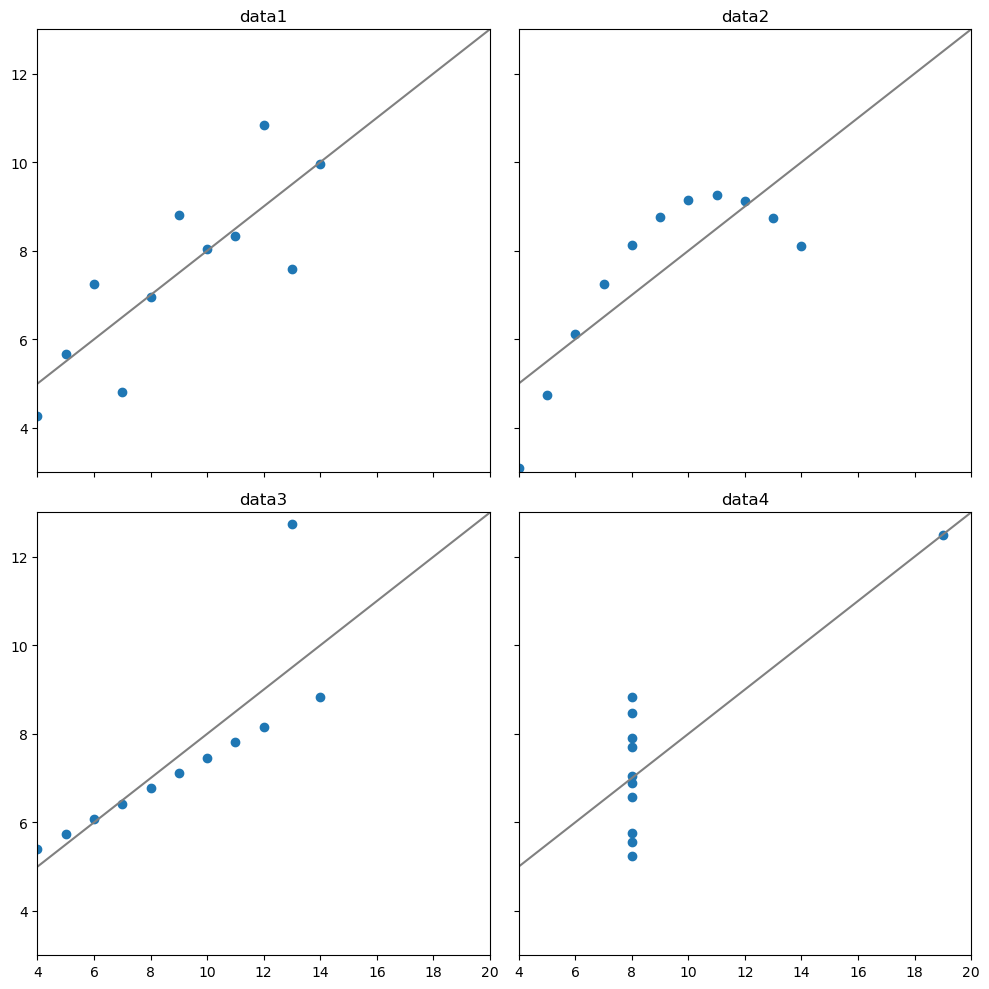

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10),
                         sharex=True, sharey=True)

xs = np.linspace(0, 30, 100)
for i, data in enumerate(anscombe_data):
    poly_fit = np.polyfit(data[:,0], data[:,1], 1)
    poly_1d = np.poly1d(poly_fit)
    ys = poly_1d(xs)
    
    ax = axes[i//2, i%2]
    ax.set_xlim([4, 20])
    ax.set_ylim([3, 13])
   
    ax.set_title(f'data{i+1}')
    ax.scatter(data[:,0], data[:,1])
    ax.plot(xs, ys, color='gray')

plt.tight_layout()
plt.show()

- In data analysis, you should not rely solely on statistical summary values; it is essential to visualize the data to directly examine its structure and distribution.